In [60]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as p
from datetime import datetime as dt
import matplotlib.pyplot as plt
from pandas_ta import ema

Import data.

In [61]:
input_file = "AAPL.csv"
data = p.read_csv(input_file)
print(data.head())

         Date      Open      High       Low     Close  Adj Close     Volume
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.100178  469033600
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.094952  175884800
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.087983  105728000
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.090160   86441600
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.092774   73449600


In [62]:
dates = data[["Date"]]
data.set_index(p.DatetimeIndex(data['Date']), inplace=True)
data = data[["Volume"]]
print(data)

               Volume
Date                 
1980-12-12  469033600
1980-12-15  175884800
1980-12-16  105728000
1980-12-17   86441600
1980-12-18   73449600
...               ...
2022-05-31  103718400
2022-06-01   74286600
2022-06-02   72348100
2022-06-03   88471400
2022-06-06   71490300

[10459 rows x 1 columns]


In [63]:
data.ta.ema(close="volume",length = 100, append = True)
print(data)

               Volume       EMA_100
Date                               
1980-12-12  469033600           NaN
1980-12-15  175884800           NaN
1980-12-16  105728000           NaN
1980-12-17   86441600           NaN
1980-12-18   73449600           NaN
...               ...           ...
2022-05-31  103718400  9.877867e+07
2022-06-01   74286600  9.829368e+07
2022-06-02   72348100  9.777991e+07
2022-06-03   88471400  9.759558e+07
2022-06-06   71490300  9.707864e+07

[10459 rows x 2 columns]


In [64]:
#remove n rows
n = 100
data = data.iloc[n:]
dates = dates.iloc[n:]
print(data)

               Volume       EMA_100
Date                               
1981-05-07    9363200  3.528233e+07
1981-05-08    7907200  3.474025e+07
1981-05-11   11939200  3.428875e+07
1981-05-12    4256000  3.369404e+07
1981-05-13    4905600  3.312397e+07
...               ...           ...
2022-05-31  103718400  9.877867e+07
2022-06-01   74286600  9.829368e+07
2022-06-02   72348100  9.777991e+07
2022-06-03   88471400  9.759558e+07
2022-06-06   71490300  9.707864e+07

[10359 rows x 2 columns]


In [65]:

X_train, X_test, y_train, y_test = train_test_split(data[["Volume"]], data[["EMA_100"]])
print(X_train.size)
print(y_train.size)


7769
7769


In [66]:

regr = LinearRegression(fit_intercept=True)
regr.fit(X_train, y_train)
print("Coefficients: ", regr.coef_)
print("Intercept: ", regr.intercept_)

Coefficients:  [[0.54702076]]
Intercept:  [1.51315166e+08]


In [67]:

y_pred_train = regr.predict(X_train)
print(y_train)
print(y_pred_train)

                 EMA_100
Date                    
2001-03-28  5.045084e+08
2001-01-26  5.591568e+08
2008-10-16  1.152632e+09
1988-10-13  1.472769e+08
1985-08-23  1.618983e+08
...                  ...
2021-04-12  1.120682e+08
1996-03-13  2.868797e+08
2017-09-11  1.063128e+08
2015-08-03  1.927570e+08
2020-04-28  1.760730e+08

[7769 rows x 1 columns]
[[4.71137637e+08]
 [4.15428167e+08]
 [1.23470138e+09]
 ...
 [2.20416579e+08]
 [3.04428465e+08]
 [2.12584117e+08]]


In [68]:

y_pred_test = regr.predict(X_test)
print(y_pred_test)
print(y_test)

[[2.29553795e+08]
 [2.26795279e+08]
 [2.29736062e+08]
 ...
 [4.19367592e+08]
 [4.10471721e+08]
 [3.46059370e+08]]
                 EMA_100
Date                    
2015-09-23  2.293410e+08
1991-07-15  2.586577e+08
1988-02-18  2.301334e+08
2021-09-22  8.401001e+07
2011-06-22  4.316846e+08
...                  ...
1992-06-08  1.586921e+08
1996-10-07  1.850094e+08
1995-09-19  2.908476e+08
1988-03-03  2.247758e+08
2001-03-19  4.855765e+08

[2590 rows x 1 columns]


Mean Error and R^2 value:

In [69]:

MSE_train = mean_squared_error(y_train,y_pred_train)
print(MSE_train)
MSE_test = mean_squared_error(y_test,y_pred_test)
print(MSE_test)

2.7931549077580868e+16
2.8448807369874664e+16


In [70]:

r2Score_train = r2_score(y_train, y_pred_train)
print(r2Score_train)

0.5541979712657852


Plot

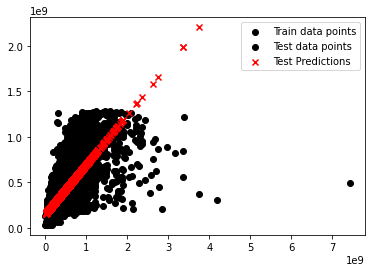

In [71]:

plt.scatter(X_train, y_train, color='black',label='Train data points')
plt.scatter(X_test, y_test, color='black', label = 'Test data points')
plt.scatter(X_test, y_pred_test, marker='x', color='red',label = 'Test Predictions')
plt.legend()
plt.show()

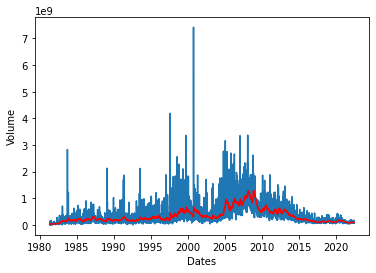

In [72]:
plt.plot(data[["Volume"]])
plt.plot(data[["EMA_100"]], color="red")
plt.plot()
plt.xlabel("Dates")
plt.ylabel("Volume")
plt.show()



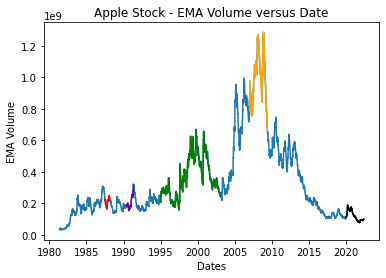

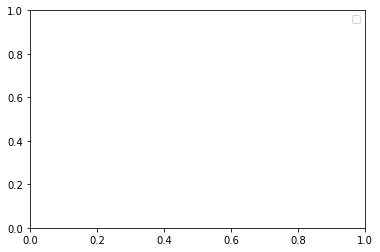

In [116]:
#Actual Plot
plt.plot(data[["EMA_100"]])
plt.xlabel("Dates")
plt.ylabel("EMA Volume")
plt.title("Apple Stock - EMA Volume versus Date")

#Create line plots for recessions
data_used = data[["EMA_100"]]
black_monday_1980 = data_used["1987-07-01":"1988-03-01"]
plt.plot(black_monday_1980, c = "red")

recession_1990s = data_used["1990-06-01":"1991-05-01"]
plt.plot(recession_1990s, c = "purple")

dot_cot_bubble = data_used["1995-01-01":"2002-12-31"]
plt.plot(dot_cot_bubble, c="green")

financial_crisis_2008 = data_used["2007-01-01":"2009-6-1"]
plt.plot(financial_crisis_2008, c = "orange")

corona = data_used["2020-01-01":]
plt.plot(corona, c = "black")

recessions = ["EMA 100", "Black Monday", "1990s Recession", 
"Dot-Com Bubble", "2007-2008 Finacial Crisis", "Coronavirus Lockdown"]
plt.legend(recessions)

plt.show()

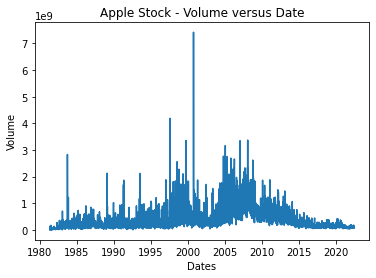

In [76]:

plt.plot(data[["Volume"]])
plt.xlabel("Dates")
plt.ylabel("Volume")
plt.title("Apple Stock - Volume versus Date")
plt.show()